# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
import numpy as np 
# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_total = pymaceuticals_df["Mouse ID"].count()
mice_total

1893

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mice_time_unique_df = pymaceuticals_df[pymaceuticals_df.duplicated(["Mouse ID", "Timepoint"])]
mice_time_unique_df
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceuticals_df[pymaceuticals_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean_df = pymaceuticals_df[pymaceuticals_df['Mouse ID'] != 'g989']
pymaceuticals_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_total = pymaceuticals_clean_df["Mouse ID"].nunique()
mice_total

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = pymaceuticals_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = pymaceuticals_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
vars = pymaceuticals_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sdev = pymaceuticals_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = pymaceuticals_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
pymaceuticals_summary_stats_df = pd.DataFrame({'Mean Tumor Volume': means, 
                                               'Median Tumor Volume': medians, 'Variance Tumor Volume': vars, 'Standard Dev Tumor Volume': sdev,
                                               'Standard Error Tumor Volume': sems})
pymaceuticals_summary_stats_df
 

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
stats_df = pymaceuticals_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='ID/Timepoints'>

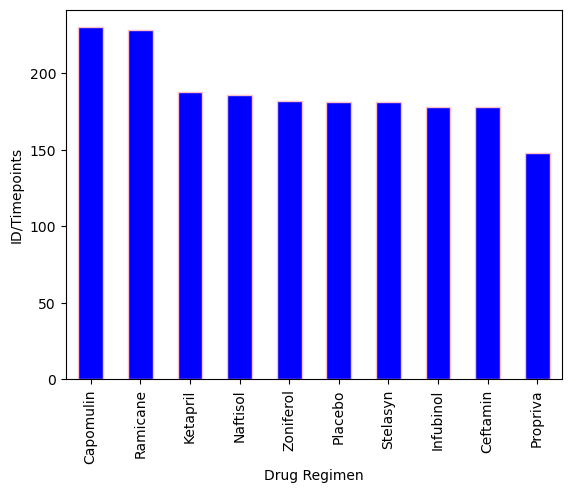

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = pymaceuticals_clean_df['Drug Regimen'].value_counts()
plt.xlabel('Drug Regimen')
plt.ylabel('ID/Timepoints')
counts.plot.bar(color = 'blue', edgecolor = 'pink')

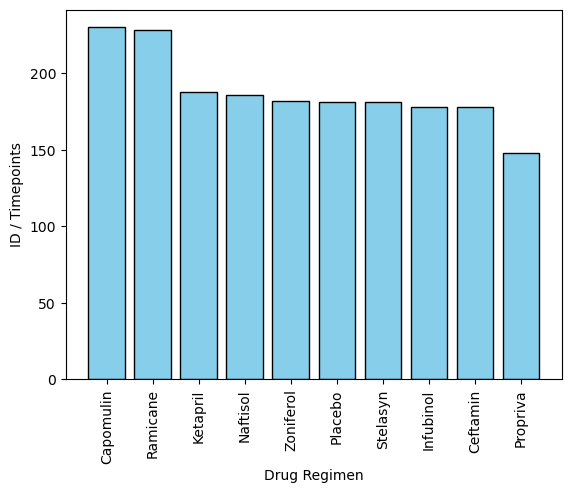

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts, color='skyblue', edgecolor='black')
plt.xlabel("Drug Regimen")
plt.ylabel("ID / Timepoints")
plt.xticks(rotation=90)
plt.show()

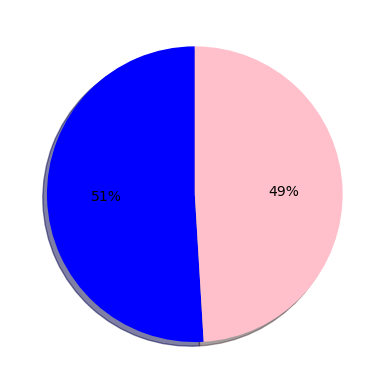

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# autopct = '%.2f' # display the percentage value to 2 decimal places
# define colors
# The startangle parameter is set to 90 degrees to start the first wedge at the top.
colors = ['blue', 'pink']
mf = pymaceuticals_clean_df['Sex'].value_counts()
plt.pie(mf, colors=colors, autopct="%1.0f%%", shadow=True, startangle=90)

plt.show()

Text(0.5, 1.0, 'Sex Distribution')

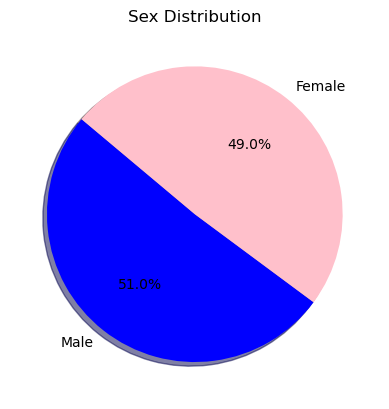

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf, labels=mf.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("Sex Distribution")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

timepoint_max_df = pymaceuticals_clean_df.groupby("Mouse ID")["Timepoint"].max()

tx_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tx_regimen_df = pymaceuticals_clean_df[pymaceuticals_clean_df['Drug Regimen'].isin(tx_regimen)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(timepoint_max_df.reset_index(), tx_regimen_df, how="left", on=["Mouse ID", "Timepoint"])
final_volume_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,NaN,NaN,NaN,NaN,NaN,NaN
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
243,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
244,z578,45,Ramicane,Male,11.0,16.0,30.638696,0.0
245,z581,45,Infubinol,Female,24.0,25.0,62.754451,3.0
246,z795,45,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
tx_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#for drug in tx_regimen:
  #  tx_regimen.append(int(['Mouse ID']['Tumor Volume (mm3)']))

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_volume_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
volume_df = final_volume_df.loc['Drug Regimen': 'tx_regimen', 'Tumor Volume (mm3)']

    # add subset 
#subset = volume_df.sample(1)

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

low_outlier = final_volume_df['Tumor Volume (mm3)'] > upper_bound
high_outlier = final_volume_df['Tumor Volume (mm3)'] < lower_bound

outliers = low_outlier & high_outlier
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: Tumor Volume (mm3), Length: 248, dtype: bool

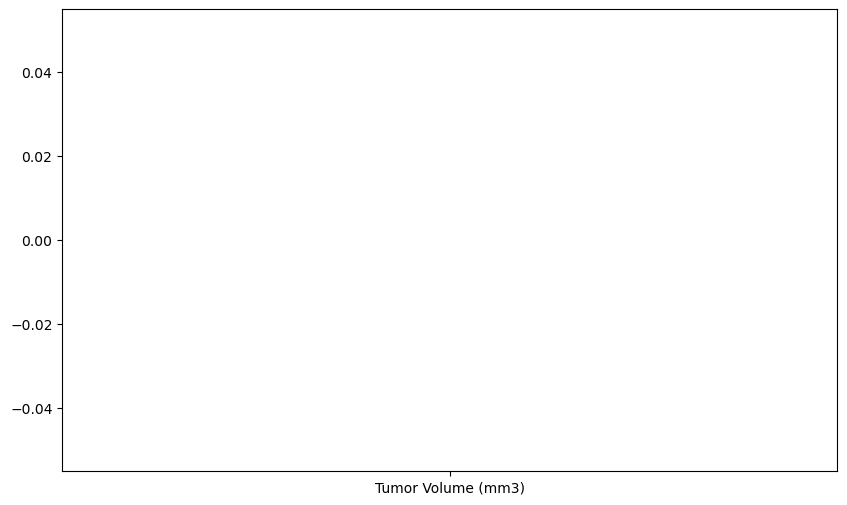

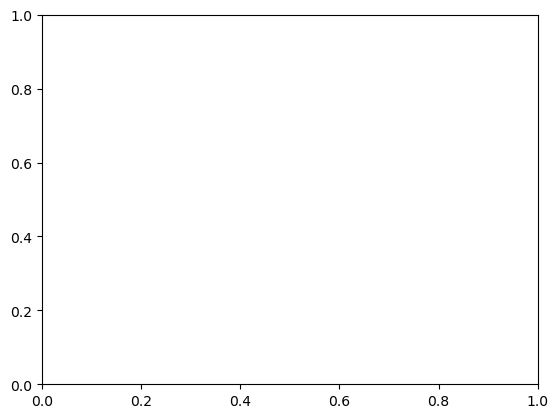

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#temperatures = temperature_df['HourlyDryBulbTemperature']

volume_df.plot(kind='box', vert=True, figsize=(10, 6)) 
fig1, ax1 = plt.subplots()
ax1.set_ylabel=('Final Tumor Volume (mm3)') 
ax1.set_xlabel = ('Treatment Regimen')
plt.show() 

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

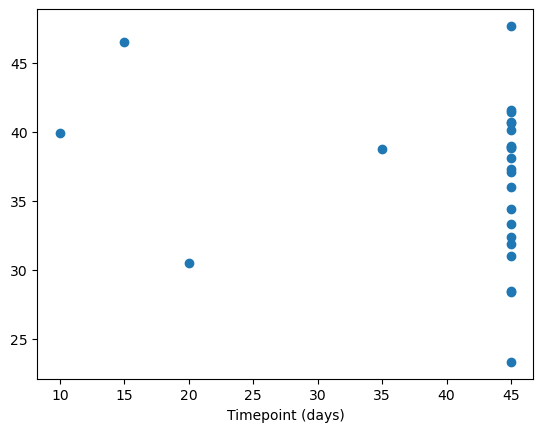

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#x_values = final_volume_df['Drug Regimen': 'Capomulin', 'Timepoint']
#y_values = final_volume_df['Drug Regimen': 'Capomulin','Tumor Volume (mm3)']
#plt.scatter(x_values,y_values)
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()

subset_df = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Capomulin', ['Timepoint', 'Tumor Volume (mm3)']]

# Extract x_values and y_values
x_values = subset_df['Timepoint']
y_values = subset_df['Tumor Volume (mm3)']

# Create a scatter plot
plt.scatter(x_values, y_values)
plt.xlabel('Timepoint (days)')

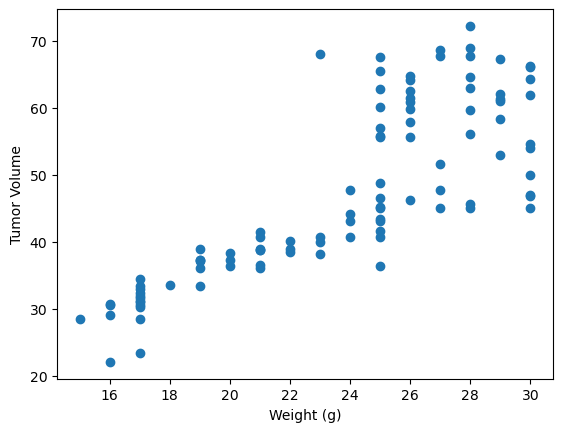

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = final_volume_df['Weight (g)']
y_values = final_volume_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

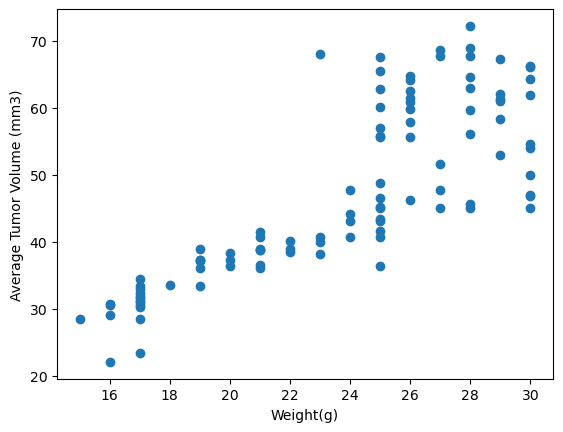

In [35]:
from scipy.stats import linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = final_volume_df['Weight (g)']
y_values = final_volume_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()